<img src="https://thevalley.es/wp-content/uploads/2016/11/thevalley-logo-negro.png" width="400"></img>

# Introducción a desarrollo de algoritmos genéticos

Es un algoritmo de **búsqueda heurística** que imita la selección natural, se utiliza para resolver problemas de **optimización**. Se trata junto con las redes neuronales en el más popular de los algoritmos inspirados en la biología.

<img src="https://www.ecestaticos.com/image/clipping/efbcba168348a16be48f451fd893f215/como-pensaba-darwin-la-regla-de-oro-de-uno-de-los-grandes-cientificos.jpg" width="400"></img>

En este ejemplo se desarrollará un algoritmo genético que nos ayude a encontrar un mínimo o un máximo de una función. La implementación del algoritmo se realizará desde cero y completamente en python para entender bien la lógica del funcionamiento de este método heurístico.

**Notebook por: David Rey**

In [ ]:
#
# Importación de librerías
#
from numpy import random

# Población y representación de los individuos

Representaremos a los indivuos como cadenas de bits, usaremos los siguientes hiperparámetros:
*  **n_pop** para representar el número de individuos en la población
*  **n_iter** representará el número de iteraciones o generaciones sobre las que vamos evolucionar la especie
* **fitness** será nuestra función objetivo y la medida de fitness (a maximizar)
* **nbits** será el número de genes de cada individuo (como representaremos el individuo como un número, esta será la representación binaria del número)

## Inicialización de la población

La población general la construiremos de forma aleatoria, usaremos enteros de resolución 16 bits, nuestra población será de 100 individuos.

In [ ]:
n_pop = 100
n_bits = 16
#
# Construimos la población como un array de enteros de 16 bits
#
pop = [random.randint(0, 2, n_bits).tolist() for _ in range(n_pop)]

#
# Mostramos los 3 primeros individuos (vemos que son una secuencia de valores binarios)
#
pop[0:3]

[[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1]]

# Algoritmo

A continuación definiremos una serie de funciones

# Función de fitness u objetivo

Esta función nos dirá como el individuo se acerca al optimo global, en nuestro caso será una función que toma como entrada un individuo y devuelve un valor continuo

In [ ]:
#
# Creación de una función de objetivo o fitness dummy
# en este caso los individuos como mayor
# trataría a todos los individuos por igual
#
def dummy_fitness(individual):
  return sum(individual)

Hacemos una prueba con el primer individuo de la población

In [ ]:
#
# Calculamos un valor de ejemplo
#
print(pop[0])
print('Resultado de la función de fitness:')
print(dummy_fitness(pop[0]))

[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]
Resultado de la función de fitness:
8


Pero podríamos haber decidido otra función fitness, por ejemplo si nos interesa favorecer a los últimos bits de la cadena, podriamos hacer que la función de fitness se calculara multiplicando por la posición de bit.

In [ ]:
# El peso de bit es 1, el 2º es 2, etc...
def dummy_fitness(individual):
  result_items = map(lambda idx: (1+idx) * individual[idx], range(0,len(individual)))
  result = sum(result_items)
  return result

Y obtendríamos

In [ ]:
#
# Calculamos un valor de ejemplo
#
print(pop[1])
print('Resultado de la función de fitness:')
print(dummy_fitness(pop[1]))

[0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1]
Resultado de la función de fitness:
58


### Manejo de restricciones
**pregunta:** ¿Cómo haríamos para tener una funcion de fitness en la que excluyeramos las cadenas con más de 10 unos?

In [ ]:
def dummy_fitness(individual):
  result = sum(individual)
  if result > 10:
    result = 0
  return result
print('Resultado de la función de fitness: ' + str(dummy_fitness(pop[0])) + ' Número de 1: ' + str(sum(pop[0])))

Resultado de la función de fitness: 8 Número de 1: 8


### Puntuaciones de fitness de la población

En cada generación calcularíamos los valores de fitness de la población completa aplicando esta función a cada uno de los valores

In [ ]:
#
# Asignamos nuestra función de fitness a la función objetivo sum
#
fitness = dummy_fitness
#
# Evaluamos a todos los individuos de de la población
#
scores = [fitness(c) for c in pop]

In [ ]:
#
# Mostramos los 10 primeros valores
#
scores[0:10]

[8, 6, 8, 0, 8, 0, 10, 0, 4, 3]

## Función de selección

Definimos una función de selección a la que pasamos un array con la población y sus scores, esta función seleccionará un individuo al azar con el que reproducir al individuo.

In [ ]:
# K es el numero de candidatos
def selection(pop, scores, k=2):
	#
  # Realizamos una primera selección aleatoria del tamaño de la población
  # selecciona un índice al azar
  #
	selection_ix = random.randint(len(pop))

  #
  # Seleciona un número k candidatos y elegimos el que mejor fitness tenga de todos
  # con lo que favorecemos la reproducción de los individuos con mayor score
	# hacemos un "torneo (tournment)" con enfrentamientos de k individuos
	#
	for ix in random.randint(0, len(pop), k):
		if scores[ix] > scores[selection_ix]:
			selection_ix = ix


	return pop[selection_ix]

In [ ]:
len(pop)

100

In [ ]:
#
# Mostramos el valor
#
selection(pop, scores, k=6)

[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]

## Creación de la siguiente generación


## Selección de progenitores

Construimos una nueva generación sobre nuestra población original

In [ ]:
#
# selección de progenitores
#
selected = [selection(pop, scores) for _ in range(n_pop)]

#
# Mostramos 3 individuos
#
selected[0:3]

[[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
 [1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]]

## Función de cruce

Definiremos la función de cruce como una *mezcla* de los cromosomas de dos progenitores, llevará asociada una probabilidad *prob_cross* de suceder. En caso de no suceder los progenitores se *clonarán* en la siguiente generación

In [ ]:
def crossover(parent_1, parent_2, prob_cross):
	# Los hijos son icialmente un clon de los padres
	children_1, children_2 = parent_1.copy(), parent_2.copy()
	# probabilidad de recombinación
	if random.rand() < prob_cross:
		# seleccionamos un punto de cruce en el vector entre 1 y la posición penúltima de la cadena
		pt = random.randint(1, len(parent_1) - 2)
		#print('Punto pivote:' + str(pt))
		# realizamos eUntitled0l cruce
		children_1 = parent_1[:pt] + parent_2[pt:]
		children_2 = parent_2[:pt] + parent_1[pt:]
	return [children_1, children_2]

Probamos la operación de cruce, vamos a forzar que suceda asi que asignamos **prob_cross=1**

In [ ]:
#
# Cruzamos los dos primeros individuos de la población
#
parent_1 = pop[0]
parent_2 = pop[1]
#
# Realizamos el proceso de cruce (asignamos un 100 )
#
child_1, child_2 = crossover(parent_1, parent_2, prob_cross = 1)

print('Padres')
print(parent_1)
print(parent_2)
print('Hijos')
print(child_1)
print(child_2)

Padres
[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1]
Hijos
[0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1]
[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]


**pregunta**: ¿en qué punto se ha hecho el cruce?

## Operación de mutación

Existe una función que permite aportar variabilidad genética a través de la operación de mutación sobre los individuos resultantes, se asigna una probabilidad muy baja a que alguno de los bits de los individuos se modifique

In [ ]:
def mutation(bitstring, prob_mut):
	for i in range(len(bitstring)):
		# para cada bit revisamos si aplicamos una mutación (es decir invertimos el bit)
		if random.rand() < r_mut:
			# invertimos el bit
			bitstring[i] = 1 - bitstring[i]
	return bitstring

# Algoritmo completo

A continuación recopilamos todas las funciones en una función que represente el algoritmo completo

In [ ]:
def genetic_algorithm(fitness, n_bits, n_iter, n_pop, prob_cross, prob_mut):
	# construimos la población original
	pop = [random.randint(0, 2, n_bits).tolist() for _ in range(n_pop)]

	# mantenemos la mejor instancia
	best, best_eval = 0, fitness(pop[0])

	# realizamos una serie de iteraciones
	for gen in range(n_iter):
		# evaluamos todos los candidatos en la población

		scores = [fitness(c) for c in pop]
		# seleccionamos la mejor solución (best of breed)
		for i in range(n_pop):
			if scores[i] > best_eval:
				best, best_eval = pop[i], scores[i]
				print(">%d, Nueva mejor solución f(%s) = %.3f" % (gen,  pop[i], scores[i]))

    # selección de individuos para el cruce (padres)
		selected = [selection(pop, scores, k=3) for _ in range(n_pop)]
		# construimos la nueva generación
		children = list()
		for i in range(0, n_pop, 2):
			# seleccionamos pares de padres
			p1, p2 = selected[i], selected[i+1]
			# aplicamos las operaciones de cruce y mutación
			for c in crossover(p1, p2, prob_cross):
				# aplicamos la mutación
				mutation(c, prob_mut)
				# guardamos el individuo para la siguiente generación
				children.append(c)
		# remplazamos la población
		pop = children
	return [best, best_eval]

## Ejemplo

Vamos a realizar un ejemplo con la función onemax que da un valor máximo cuando el vector son unos (en este caso el óptimo sería el número de bits del vector)

In [ ]:
def onemax(x):
	result = sum(x)
	return result

In [ ]:
# establecemos los parámetros
n_iter = 500
n_bits = 20
n_pop = 10
r_cross = 0.5
# Establecemos un valor relativamente bajo
r_mut = 1.0 / float(n_bits)

In [ ]:
# Buscamos el mejor individuo en 100 iteraciones
best, score = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Solución:')
print('f(%s) = %f' % (best, score))

>0, Nueva mejor solución f([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]) = 10.000
>0, Nueva mejor solución f([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1]) = 12.000
>0, Nueva mejor solución f([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1]) = 15.000
>2, Nueva mejor solución f([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]) = 16.000
>3, Nueva mejor solución f([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]) = 17.000
>4, Nueva mejor solución f([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 18.000
>5, Nueva mejor solución f([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 19.000
>16, Nueva mejor solución f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 20.000
Solución:
f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 20.000000


Probamos el efecto del tamaño de la población para ver el número de iteraciones necesarias para lograr la convergencia al óptimo

In [ ]:
# Buscamos el mejor individuo en 100 iteraciones
best, score = genetic_algorithm(fitness = onemax,
                                n_bits = n_bits,
                                n_iter = n_iter,
                                n_pop = 200,
                                prob_cross = 0.01,
                                prob_mut = 0.01)
print('Solución:')
print('f(%s) = %f' % (best, score))

>0, Nueva mejor solución f([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]) = 12.000
>0, Nueva mejor solución f([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]) = 15.000
>2, Nueva mejor solución f([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]) = 16.000
>2, Nueva mejor solución f([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]) = 17.000
>4, Nueva mejor solución f([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 18.000
>7, Nueva mejor solución f([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 19.000
>10, Nueva mejor solución f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 20.000
Solución:
f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 20.000000


In [ ]:
# Buscamos el mejor individuo en 100 iteraciones
best, score = genetic_algorithm(fitness = onemax,
                                n_bits = n_bits,
                                n_iter = n_iter,
                                n_pop = 100,
                                prob_cross = 0.6,
                                prob_mut = r_mut)
print('Solución:')
print('f(%s) = %f' % (best, score))

>0, Nueva mejor solución f([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1]) = 14.000
>0, Nueva mejor solución f([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]) = 15.000
>0, Nueva mejor solución f([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]) = 17.000
>2, Nueva mejor solución f([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]) = 18.000
>3, Nueva mejor solución f([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 19.000
>6, Nueva mejor solución f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 20.000
Solución:
f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = 20.000000


**pregunta**: ¿cual es el efecto de la población en el proceso?, pista: número de generaciones necesarias y tiempos

**pregunta:** ¿para que nos valen en este caso las probabilidades de cruce y mutación?

## Aplicación de un genético un poco más real

En realidad el ejemplo anterior no tiene mucha utilidad práctica porque nadie nos va a pedir que trabajemos con arrays de bits. Ahora vamos a poner un ejemplo más realista. Para ello vamos a ver como usaríamos el algorimo anterior (con ligeras modificaciones) para buscar el mínimo deuna función entera.
En este caso buscaremos el mínimo de la función:

 $f(x) = x^2$.

que como sabemos tiene su óptimo en el (0,0)

<img src="https://upload.wikimedia.org/wikipedia/commons/d/dd/Function_x%5E2.svg" width="300"></img>


### Definición de la función objetivo


In [ ]:
# Función objetivo, los componentes serán dos coordenadas x, y
def x_2(x):
	return x[0]**2.0 + x[1]**2.0

### Codificación de los valores

Construimos una función que decodifica un string de bits de un tamaño determinado y lo transforma en un vector de números

Por ejemplo en una representación de 6 bits el array:

$ x= (x_1,x_2) = [1,0,1,0,1,1]$ se podría descomponer en:

* $x_1 = [1,0,1]$
* $x_2 = [0,1,1]$

Los valores posibles de cada vector tomarán valores desde [0,0 ... 0] a [1,1,...1] codificados en base 2 ([en binario](https://medium.com/@matematicasdiscretaslibro/cap%C3%ADtulo-2-sistemas-num%C3%A9ricos-de-codificaci%C3%B3n-1a87d670d9bb)). El maximo y mínimo se lo asignaremos a un máximo y mínimo establecido en la variable bounds:

In [ ]:
#
# Establecemos un espacio de valores posibles para las entradas
#
bounds = [[-5.0, 5.0], [-5.0, 5.0]]

En el ejemplo en el que representamos el genoma con 6 genes (bits), tendríamos que, para cada valor de x , para los limites (bounds) [-5 a +5]:

* El mínimo sería [0,0,0] sería -5
* El máximo sería [1,1,1] sería +5

En realidad si hablamos de representación binaria de números enteros los valores enteros de  vectores binarios de 3 posiciones serían:

* $[0,0,0] = 2^2 * 0 + 2^1 * 0 + 2^0 * 0 = 0$
* $[0,0,1] = 2^2 * 0 + 2^1 * 0 + 2^0 * 1 = 1$
* $[0,1,0] = 2^2 * 0 + 2^1 * 1 + 2^0 * 0 = 2$
* $[0,1,1] = 2^2 * 0 + 2^1 * 1 + 2^0 * 1 = 3$
* $[1,0,0] = 2^2 * 1 + 2^1 * 0 + 2^0 * 0 = 4$
* $[1,0,1] = 2^2 * 1 + 2^1 * 0 + 2^0 * 1 = 5$
* $[1,1,0] = 2^2 * 1 + 2^1 * 1 + 2^0 * 0 = 6$
* $[1,1,1] = 2^2 * 1 + 2^1 * 1 + 2^0 * 1 = 7$

In [ ]:
#
# decodificamos el valor en array
# [bit_1 ... bit_n/2 .... bit_n]
# los primeros n/2 bits corresponden al valor de x_1
# y los restantes al valor de x_2
#
def decode(bounds, n_bits, bitstring):
	decoded = list()
	largest = 2**n_bits
	for i in range(len(bounds)):
		# extraemos la subcadena
		start, end = i * n_bits, (i * n_bits)+n_bits
		substring = bitstring[start:end]
		# convertimos la subcadena a una subcadena de caracteres
		chars = ''.join([str(s) for s in substring])
		# construimos la cadena en enteros
		integer = int(chars, 2)
		# escalamos el entero al rango deseado
		value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
		# lo guardamos
		decoded.append(value)
	return decoded

Vemos un ejemplo de cómo tranformamos un individuo en su representación binaria

In [ ]:
n_pop = 1
# initial population of random bitstring
pop = [random.randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]

Y como esto da lugar a una *tupla* de dos elementos $(x,y)$ dentro del rango marcado

In [ ]:
print(pop[0])
print(decode(bounds, n_bits, pop[0]))

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]
[-4.799251556396484, -1.3746356964111328]


In [ ]:
for i in range(0, n_pop, 2):
  print(i)

0


## Algoritmo final

Modificamos ligeramente nuestro algoritmo para incorporar el proceso de decodificación

In [ ]:
def genetic_algorithm(fitness, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
	# construimos la población original
	pop = [random.randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
	# mantenemos registro de la mejor iteración
	best, best_eval = 0, fitness(decode(bounds, n_bits, pop[0]))

	# ejecutamos todas las iteraciones
	for gen in range(n_iter):
		# decodificamos la población
		decoded = [decode(bounds, n_bits, p) for p in pop]
		# evaluamos todos los candidatos de la población
		scores = [fitness(d) for d in decoded]

		# revisamos si hemos conseguidmo mejorar la solución
		for i in range(n_pop):
      # Redondeamos al 5er decimal
			if round(scores[i],5) > round(best_eval,5):
				best, best_eval = pop[i], scores[i]
				print(">%d, Nueva mejor solución f(%s) = %f" % (gen,  decoded[i], scores[i]))

		# seleccionamos los individuos para la reproducción
		selected = [selection(pop, scores) for _ in range(n_pop)]
		# construimos la siguiente generación
		children = list()
		for i in range(0, n_pop, 2):
			# seleccionamos pares de padres
			p1, p2 = selected[i], selected[i+1]
			# aplicamos las operaciones de cruce y mutación
			for c in crossover(p1, p2, r_cross):
				# mutación
				mutation(c, r_mut)
				# guardamos el individuo para la siguiente generación
				children.append(c)
		# remplazamos la población
		pop = children
	return [gen, best, best_eval]

Definimos unos parámetros

In [ ]:
# define range for input
bounds = [[-5.0, 5.0], [-5.0, 5.0]]
n_iter = 100
n_bits = 16
n_pop = 1000
r_cross = 0.5
r_mut = 1.0 / (float(n_bits) * len(bounds))

Como hemos diseñado nuestro algoritmo para buscar el máximo si en este caso buscamos un mínimo la función **fitness** debe ofrecer valores más alto a los resultados de $y$ más bajos por tanto nuestra función objetivo sería

In [ ]:
# Función objetivo f(x) = - x², los componentes serán dos coordenadas x, y
def _x_2(x):
	return -(x[0]**2.0 + x[1]**2.0)

In [ ]:
%timeit
# Buscamos el mejor individuo en 300 iteraciones
n_gen, best, score = genetic_algorithm(fitness = _x_2,
                                           bounds = bounds,
                                           n_bits = n_bits,
                                           n_iter = n_iter,
                                           n_pop = n_pop,
                                           r_cross = r_cross,
                                           r_mut = r_mut)
print('Solución (número de generaciones: %d):' % n_gen)
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

>0, Nueva mejor solución f([4.375152587890625, 0.227203369140625]) = -19.193582
>0, Nueva mejor solución f([1.933135986328125, -2.816314697265625]) = -11.668643
>0, Nueva mejor solución f([-0.8758544921875, 2.479248046875]) = -6.913792
>0, Nueva mejor solución f([-1.0150146484375, -2.3870849609375]) = -6.728429
>0, Nueva mejor solución f([-1.41754150390625, 0.319061279296875]) = -2.111224
>0, Nueva mejor solución f([-0.082550048828125, -0.874176025390625]) = -0.770998
>0, Nueva mejor solución f([0.00244140625, 0.510406494140625]) = -0.260521
>0, Nueva mejor solución f([-0.2935791015625, -0.331878662109375]) = -0.196332
>0, Nueva mejor solución f([-0.0146484375, -0.42388916015625]) = -0.179897
>0, Nueva mejor solución f([-0.172576904296875, -0.093994140625]) = -0.038618
>0, Nueva mejor solución f([-0.1873779296875, -0.006866455078125]) = -0.035158
>1, Nueva mejor solución f([-0.1678466796875, -0.026397705078125]) = -0.028869
>2, Nueva mejor solución f([0.101165771484375, 0.0663757324218

### Mejoras del proceso, incorporación del criterio de parada

Hemos visto como la convergencia puede llegar bastante antes de realizar todas las iteraciones, podemos incluir un criterio de parada en el que en el caso de que si suceden k iteraciones sin lograr una mejora el proceso para

In [ ]:
def genetic_algorithm_early_stop(fitness, bounds, n_bits, n_iter, n_pop, r_cross, r_mut, early_stop_condition = -1):
  # Si no se indica el criterio de parada ejecutamos todas las iteraciones
	early_stop_condition = n_iter if early_stop_condition == -1 else early_stop_condition
	early_stop_iterations = 0 # Numero de iteraciones con parada temprana
	# construimos la población original
	pop = [random.randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
	# mantenemos registro de la mejor iteración
	best, best_eval = 0, fitness(decode(bounds, n_bits, pop[0]))
	# ejecutamos todas las iteraciones
	for gen in range(n_iter):
		# decodificamos la población
		decoded = [decode(bounds, n_bits, p) for p in pop]
		# evaluamos todos los candidatos de la población
		scores = [fitness(d) for d in decoded]
		# revisamos si hemos conseguidmo mejorar la solución
		for i in range(n_pop):
      # Redondeamos al 5er decimal
			if round(scores[i],5) > round(best_eval,5):
				best, best_eval = pop[i], scores[i]
				print(">%d, Nueva mejor solución f(%s) = %f" % (gen,  decoded[i], scores[i]))
				early_stop_iterations = 0 # reseteo del contador

		early_stop_iterations = early_stop_iterations + 1
		if early_stop_iterations > early_stop_condition:
				print("Parada temprana agotado el maximo de iteraciones sin mejora %d" % (early_stop_iterations))
				break
		# seleccionamos los individuos para la reproducción
		selected = [selection(pop, scores) for _ in range(n_pop)]
		# construimos la siguiente generación
		children = list()
		for i in range(0, n_pop, 2):
			# seleccionamos pares de padres
			p1, p2 = selected[i], selected[i+1]
			# aplicamos las operaciones de cruce y mutación
			for c in crossover(p1, p2, r_cross):
				# mutación
				mutation(c, r_mut)
				# guardamos el individuo para la siguiente generación
				children.append(c)
		# remplazamos la población
		pop = children
	return [gen, best, best_eval]

Probamos el nuevo proceso, establecemos un número de 10 generaciones in mejora como criterio de parada temprana, vemos como logramos un resultado similar con un tiempo mucho menor

In [ ]:
# Definición de hiperparámetros
bounds = [[-5.0, 5.0], [-5.0, 5.0]]
n_iter = 200000
n_bits = 16
n_pop = 3000
r_cross = 0.9
r_mut = 1.0 / (float(n_bits) * len(bounds))

# Buscamos el mejor individuo iteraciones esta vez con un criterio de parada
n_gen, best, score = genetic_algorithm_early_stop(fitness = _x_2,
                                           bounds = bounds,
                                           n_bits = n_bits,
                                           n_iter = n_iter,
                                           n_pop = n_pop,
                                           r_cross = r_cross,
                                           r_mut = r_mut,
                                           early_stop_condition = 10)
print('Solución (número de generaciones: %d):' % n_gen)
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))
print('Representación binaria:', best)

>0, Nueva mejor solución f([-4.709014892578125, -0.7952880859375]) = -22.807304
>0, Nueva mejor solución f([-3.126983642578125, 1.46240234375]) = -11.916647
>0, Nueva mejor solución f([0.811614990234375, 1.2469482421875]) = -2.213599
>0, Nueva mejor solución f([-0.79193115234375, 0.407562255859375]) = -0.793262
>0, Nueva mejor solución f([0.373382568359375, -0.46478271484375]) = -0.355438
>0, Nueva mejor solución f([0.202789306640625, -0.307159423828125]) = -0.135470
>0, Nueva mejor solución f([0.10955810546875, 0.106964111328125]) = -0.023444
>1, Nueva mejor solución f([-0.0030517578125, -0.0238037109375]) = -0.000576
>4, Nueva mejor solución f([-0.018463134765625, 0.01312255859375]) = -0.000513
>4, Nueva mejor solución f([-0.007171630859375, 0.01678466796875]) = -0.000333
>5, Nueva mejor solución f([-0.007171630859375, 0.007781982421875]) = -0.000112
>8, Nueva mejor solución f([0.00518798828125, -0.003509521484375]) = -0.000039
>9, Nueva mejor solución f([0.00457763671875, -0.0025939

### Otro ejemplo



In [ ]:
# Función objetivo f(x) = 0.5(x+2)², los componentes serán dos coordenadas x, y
def another_function(x):
	return -( (0.5 * (x[0]+2)**2.0))


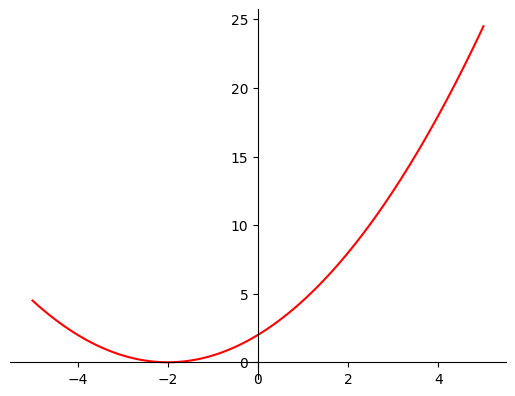

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# 100 linearly spaced numbers
x = np.linspace(-5,5,100)
# La función
y = 0.5*(2+x)**2
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x, y, 'r')

# show the plot
plt.show()

In [ ]:
bounds = [[-5.0, 5.0]]
# Buscamos el mejor individuo iteraciones esta vez con un criterio de parada
n_gen, best, score = genetic_algorithm_early_stop(fitness = another_function,
                                           bounds  = bounds,
                                           n_bits = n_bits,
                                           n_iter = n_iter,
                                           n_pop = n_pop,
                                           r_cross = r_cross,
                                           r_mut = r_mut,
                                           early_stop_condition = 20)
print('Solución (número de generaciones: %d):' % n_gen)
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))
print('Representación binaria:', best)

>0, Nueva mejor solución f([-3.292999267578125]) = -0.835924
>0, Nueva mejor solución f([-2.518310546875]) = -0.134323
>0, Nueva mejor solución f([-1.809844970703125]) = -0.018079
>0, Nueva mejor solución f([-1.8341064453125]) = -0.013760
>0, Nueva mejor solución f([-1.837158203125]) = -0.013259
>0, Nueva mejor solución f([-1.868133544921875]) = -0.008694
>0, Nueva mejor solución f([-2.090606689453125]) = -0.004105
>0, Nueva mejor solución f([-2.02606201171875]) = -0.000340
>0, Nueva mejor solución f([-2.023468017578125]) = -0.000275
>0, Nueva mejor solución f([-2.019500732421875]) = -0.000190
>0, Nueva mejor solución f([-1.982421875]) = -0.000154
>0, Nueva mejor solución f([-2.008819580078125]) = -0.000039
>0, Nueva mejor solución f([-2.003326416015625]) = -0.000006
>1, Nueva mejor solución f([-1.99951171875]) = -0.000000
Parada temprana agotado el maximo de iteraciones sin mejora 21
Solución (número de generaciones: 21):
f([-1.99951171875]) = -0.000000
Representación binaria: [0, 1, 

# Referencias

Parte de este ejercicio se ha inspirado en este ejercicio [desarrollado en el siguiente artículo](https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/)
